In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os
import json

In [33]:
with open('data/paths.json','r') as f:
    paths = json.load(f)

data_path = paths["data_path"]

In [34]:
data = pd.read_csv(os.path.join(data_path,'clean_data.csv'))
data.tail()

,sex,treatment,tissue,injectionVolume,massInfo,componentGroupName,expectedRt,area,isArea,areaRatio,retentionTime,signalNoise,tissueWeightMg,normalizedArea,sampleName,isNormalizationFactor,normfactor
57259,Female,Deltamethrin,Cortex,10,301.0 / 257.0,PUFA,2.65,9.494550e+05,429984.07819,2.208117,2.722196,70.891580,40,5.520292,18,False,11
57260,Female,Deltamethrin,Cortex,10,327.0 / 283.0,PUFA,2.82,1.502219e+08,429984.07819,349.366103,2.558918,284.097687,40,873.415258,18,False,11
57261,Female,Deltamethrin,Cortex,10,329.0 / 285.0,PUFA,2.80,1.058937e+07,429984.07819,24.627343,2.543228,176.422195,40,61.568359,18,False,11
57262,Female,Deltamethrin,Cortex,10,331.0 / 287.0,PUFA,2.79,1.978464e+06,429984.07819,4.601250,2.563011,83.911044,40,11.503124,18,False,11
57263,Female,Deltamethrin,Cortex,10,303.0 / 259.0,PUFA,2.81,1.463774e+08,429984.07819,340.425180,2.559217,270.128505,40,851.062950,18,False,11


In [35]:
columns_to_transform = ['areaRatio']

for c in columns_to_transform:
    data['log'+c[0].capitalize()+c[1:]] = data[c].apply(lambda x: np.log(x))

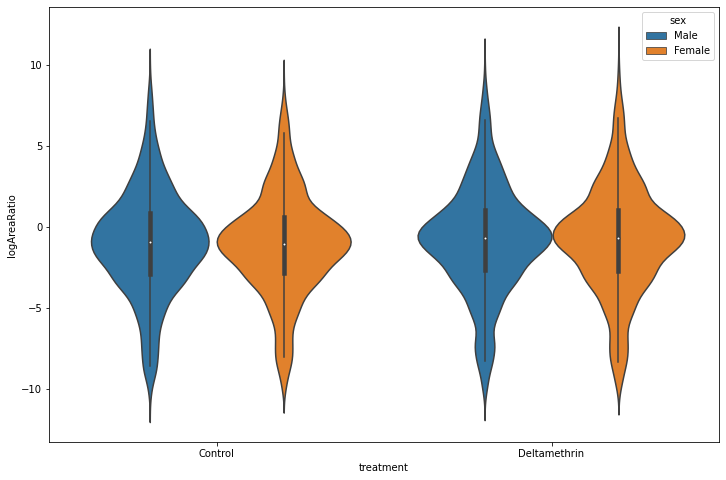

In [50]:
plt.figure(figsize=(12,8))
sns.violinplot(data=data, x='sex', hue='treatment', y='logAreaRatio')
plt.show()

In [48]:
from scipy.stats import ttest_ind, ranksums

tissue = 'Striatum'
var_name = 'areaRatio'

data_normalized = data[data['isNormalizationFactor'] == False]

a = data_normalized[(data_normalized['treatment'] == 'Control') & (data_normalized['tissue']==tissue)][var_name]
b = data_normalized[(data_normalized['treatment'] == 'Deltamethrin') & (data_normalized['tissue']==tissue)][var_name]

a = a.dropna()
b = b.dropna()

print(a.shape)
print(b.shape)

print(ranksums(a,b))

(7952,)
(7841,)
RanksumsResult(statistic=-10.833823824100495, pvalue=2.3800419067222896e-27)
